## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from keras.callbacks import Callback


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df_org=application_df.copy()
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
(application_df.columns)

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
application_df['IS_SUCCESSFUL'].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=['EIN','NAME'],axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1




---

---





## Optimization
### Step 1: Look at the categorical columns and clean them


In [5]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

for x in application_cat:
  print(f"{x} value counts:")
  print(f"{application_df[x].value_counts()}")
  print(" ")
  print('*'*30)

application_df['STATUS'].value_counts()

APPLICATION_TYPE value counts:
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64
 
******************************
AFFILIATION value counts:
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64
 
******************************
CLASSIFICATION value counts:
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64
 
******************************
USE_CASE value counts:
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dty

1    34294
0        5
Name: STATUS, dtype: int64



---



In [6]:
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [7]:
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [8]:
#Drop SPECIAL_CONSIDERATIONS and STATUS columns (These columns have mostly one single value) 
application_df=application_df.drop(columns=['STATUS','SPECIAL_CONSIDERATIONS'],axis=1)

## Pick a cutoff point to bin "rare" categorical variables together in a new value, "Other"

In [9]:
affiliation_type=application_df['AFFILIATION'].value_counts()
affiliation_type


Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [10]:
# replace affiliation types
affiliation_type_to_replace=[x for x in affiliation_type.keys() if (affiliation_type[x]<1000)]

# Replace in dataframe
for x in affiliation_type_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(x,"Other")

# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64



---



In [11]:
use_case_type=application_df['USE_CASE'].value_counts()
use_case_type

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [12]:
# replace use_case types
use_case_type_to_replace=[x for x in use_case_type.keys() if (use_case_type[x]<1000)]

# Replace in dataframe
for x in use_case_type_to_replace:
    application_df['USE_CASE'] = application_df['USE_CASE'].replace(x,"Other")

# Check to make sure binning was successful
application_df['USE_CASE'].value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64



---






In [13]:

organization_type=application_df['ORGANIZATION'].value_counts()
organization_type

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [14]:
# replace organization types
organization_type_to_replace=[x for x in organization_type.keys() if (organization_type[x]<1000)]

# Replace in dataframe
for x in organization_type_to_replace:
    application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace(x,"Other")

# Check to make sure binning was successful
application_df['ORGANIZATION'].value_counts()

Trust          23515
Association    10255
Other            529
Name: ORGANIZATION, dtype: int64



---



In [15]:
app_type=application_df['APPLICATION_TYPE'].value_counts()
app_type


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace=[x for x in app_type.keys() if (app_type[x]<200)]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [17]:
class_type=application_df['CLASSIFICATION'].value_counts()
class_type 

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [18]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_type[class_type>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [19]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace=[x for x in class_type.keys() if (class_type[x]<1000)]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()



C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64



---



---



In [20]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']



---



---



In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

<ipython-input-22-fae914666e78>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Split our preprocessed data into our features and target arrays
X=application_df.drop(columns='IS_SUCCESSFUL',axis=1)
X

,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Split our preprocessed data into our features and target arrays
y=application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



---

---



### Step 2 : Improving The Model



---



---



In [26]:
import matplotlib.pyplot as plt

In [27]:
"""fitModel(X,y, inputdim, activation,firstUnit,hiddenUnits,batch_size, epochs) returns nn_model and model_history"""
def fitModel(X,y, inputdim, activation,firstUnit,hiddenUnits,batch_size, epochs):
    
    nn_model = tf.keras.models.Sequential()
    dense = tf.keras.layers.Dense(input_dim=inputdim, units=firstUnit, activation=activation)
    nn_model.add(dense)

    for unit in hiddenUnits:
      dense=tf.keras.layers.Dense(units=unit, activation=activation)
      nn_model.add(dense)
    
    # Output layer
    output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")
    nn_model.add(output_layer)

    # Check the structure of the model
    nn_model.summary()
    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    fit_model = nn_model.fit(X, y,batch_size=batch_size, epochs=epochs)
    model_history=fit_model.history
  
    return (nn_model,model_history)

In [28]:
"""model_evaluation(X_test,y_test,nn_model) returns history_df"""
def model_evaluation(X_test,y_test,nn_model):
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn_model.evaluate(X_test,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    




---
## Improving by adding:
### - more nodes
### - more layers
### - more layers and different activation(tanh)


In [33]:
inputdim= X.shape[1]

#Original design 
nn_model1,model_history1=fitModel(X=X_train_scaled, y=y_train, 
         inputdim=X.shape[1],
         firstUnit=80,hiddenUnits=[30],
         batch_size=30, epochs=100,activation='relu')

nn_model1.save("model1.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                2800      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5673 - accuracy: 0.7216
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7281
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7308
Epoch 4/100
8

In [35]:
#add more nodes
inputdim= X.shape[1]

nn_model2,model_history2=fitModel(X=X_train_scaled, y=y_train, 
         inputdim=X.shape[1],
         firstUnit=100,hiddenUnits=[60],
         batch_size=30, epochs=100,activation='relu')
nn_model2.save("model2.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               3500      
                                                                 
 dense_14 (Dense)            (None, 60)                6060      
                                                                 
 dense_15 (Dense)            (None, 1)                 61        
                                                                 
Total params: 9,621
Trainable params: 9,621
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5670 - accuracy: 0.7207
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7283
Epoch 3/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5523 - accuracy: 0.7298
Epoch 4/100
8

In [29]:
#add more layers
inputdim= X.shape[1]
nn_model3,model_history3=fitModel(X=X_train_scaled, y=y_train, 
         inputdim=X.shape[1],
         firstUnit=80,hiddenUnits=[30,20,20],
         batch_size=30, epochs=100,activation='relu')
nn_model3.save("model3.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2800      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,291
Trainable params: 6,291
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
858/858 [==============================] -

In [31]:
#add more layers with activation: 'tanh'
inputdim= X.shape[1]
nn_model4,model_history4=fitModel(X=X_train_scaled, y=y_train, 
         inputdim=X.shape[1],
         firstUnit=80,hiddenUnits=[30,20,20],
         batch_size=30, epochs=100,activation='tanh')
nn_model4.save("model4.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                2800      
                                                                 
 dense_6 (Dense)             (None, 30)                2430      
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,291
Trainable params: 6,291
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
858/858 [==============================]

In [39]:
#add more layers with activation: 'tanh'
inputdim= X.shape[1]
nn_model5,model_history5=fitModel(X=X_train_scaled, y=y_train, 
         inputdim=X.shape[1],
         firstUnit=80,hiddenUnits=[30,20,20,20,10],
         batch_size=30, epochs=100,activation='tanh')
nn_model5.save("model5.h5")

history_df5 = pd.DataFrame(model_history5)
history_df5.to_csv('model5.csv')


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                2800      
                                                                 
 dense_17 (Dense)            (None, 30)                2430      
                                                                 
 dense_18 (Dense)            (None, 20)                620       
                                                                 
 dense_19 (Dense)            (None, 20)                420       
                                                                 
 dense_20 (Dense)            (None, 20)                420       
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 1)                

In [34]:
history_df1 = pd.DataFrame(model_history1)
history_df1.to_csv('model1.csv')



In [36]:
history_df2 = pd.DataFrame(model_history2)
history_df2.to_csv('model2.csv')

In [30]:
history_df3 = pd.DataFrame(model_history3)
history_df3.to_csv('model3.csv')

In [32]:
history_df4 = pd.DataFrame(model_history4)
history_df4.to_csv('model4.csv')



---

---





<Axes: title={'center': 'Tranining Accuracy'}>

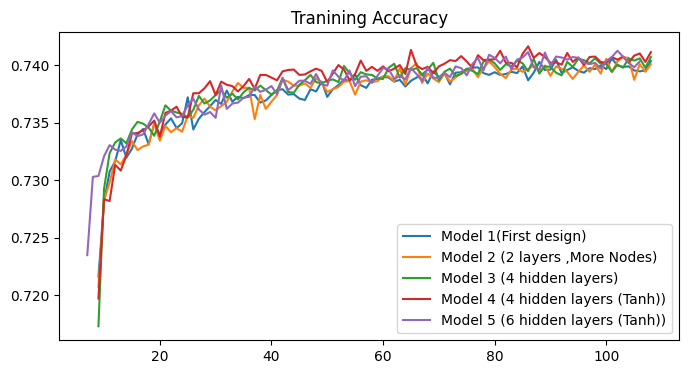

In [48]:
#***********************

history_df1.index += 1
history_df2.index += 1
history_df3.index += 1
history_df4.index += 1
history_df5.index += 1

plt.rcParams["figure.figsize"] = [8, 4]
fig, ax1 = plt.subplots(1)
history_df1.plot(y="accuracy",ax=ax1,label='Model 1(First design)',title='Tranining Accuracy')
history_df2.plot(y="accuracy",ax=ax1,label='Model 2 (2 layers ,More Nodes)')
history_df3.plot(y="accuracy",ax=ax1,label='Model 3 (4 hidden layers)')
history_df4.plot(y="accuracy",ax=ax1,label='Model 4 (4 hidden layers (Tanh))')
history_df5.plot(y="accuracy",ax=ax1,label='Model 5 (6 hidden layers (Tanh))')



#********************

<Axes: title={'center': 'Tranining Loss'}>

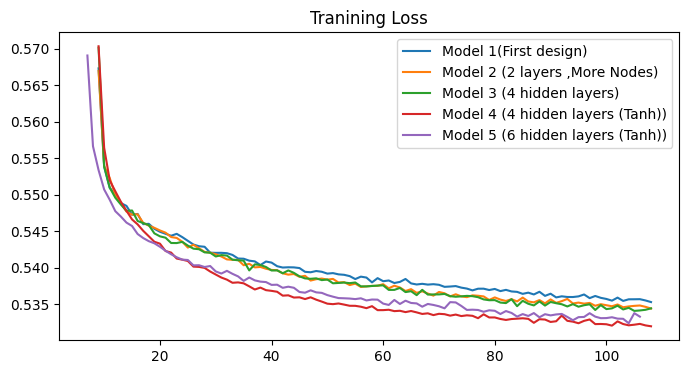

In [60]:
plt.rcParams["figure.figsize"] = [8, 4]
fig, ax2 = plt.subplots(1)

history_df1.plot(y="loss",ax=ax2,label='Model 1(First design)',title='Tranining Loss')
history_df2.plot(y="loss",ax=ax2,label='Model 2 (2 layers ,More Nodes)')
history_df3.plot(y="loss",ax=ax2,label='Model 3 (4 hidden layers)')
history_df4.plot(y="loss",ax=ax2,label='Model 4 (4 hidden layers (Tanh))')
history_df5.plot(y="loss",ax=ax2,label='Model 5 (6 hidden layers (Tanh))')

In [59]:
from tensorflow import keras
print ("-"*32)
print("        Model Evaluations    ")
print ("-"*32)

print ('****   Model 1  ***')
model= keras.models.load_model('model1.h5')
model.summary()
print("Model Evaluations    ")
model_evaluation(X_test=X_test_scaled,y_test=y_test,nn_model=nn_model1)
print('\n'+'*'*32+"\n\n")

print ('****   Model 2  ***')
model= keras.models.load_model('model2.h5')
model.summary()
print("Model Evaluations    ")
model_evaluation(X_test=X_test_scaled,y_test=y_test,nn_model=nn_model2)
print('\n'+'*'*32+"\n\n")


print ('****   Model 3  ***')
model= keras.models.load_model('model3.h5')
model.summary()
print("Model Evaluations    ")
model_evaluation(X_test=X_test_scaled,y_test=y_test,nn_model=nn_model3)
print('\n'+'*'*32+"\n\n")


print ('****   Model 4  ***')
model= keras.models.load_model('model4.h5')
model.summary()
print("Model Evaluations    ")
model_evaluation(X_test=X_test_scaled,y_test=y_test,nn_model=nn_model4)
print('\n'+'*'*32+"\n\n")


print ('****   Model 5  ***')
model= keras.models.load_model('model5.h5')
model.summary()
print("Model Evaluations    ")
model_evaluation(X_test=X_test_scaled,y_test=y_test,nn_model=nn_model5)
print('\n'+'*'*32+"\n\n")

--------------------------------
        Model Evaluations    
--------------------------------
****   Model 1  ***
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                2800      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________
Model Evaluations    
268/268 - 0s - loss: 0.5567 - accuracy: 0.7283 - 413ms/epoch - 2ms/step
Loss: 0.5566922426223755, Accuracy: 0.7282798886299133

********************************


****   Model 2 

In [53]:
from tensorflow import keras

model= keras.models.load_model('model1.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                2800      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________
